In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import warnings
import os
warnings.filterwarnings('ignore')

In [3]:
file_path = r"c:\Users\bhava\OneDrive\Desktop\prototype\Models\Data\telecom_churn_3000.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,Male,0,Yes,Yes,52,96.27,6841.59,No,No,No,No,Yes,One year,Yes,Bank transfer,No
1,Female,0,No,Yes,4,62.74,3830.88,Fiber optic,No,Yes,Yes,Yes,Two year,No,Credit card,No
2,Male,0,Yes,Yes,34,82.66,2745.98,DSL,Yes,No,No,No,One year,No,Bank transfer,No
3,Male,0,No,Yes,69,92.76,4287.82,DSL,Yes,No,Yes,No,One year,Yes,Credit card,No
4,Male,0,Yes,Yes,33,87.93,929.60,Fiber optic,Yes,Yes,Yes,No,Two year,No,Bank transfer,No


In [5]:
df.Churn.value_counts()

Churn
No     2296
Yes     704
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            3000 non-null   object 
 1   SeniorCitizen     3000 non-null   int64  
 2   Partner           3000 non-null   object 
 3   Dependents        3000 non-null   object 
 4   Tenure            3000 non-null   int64  
 5   MonthlyCharges    3000 non-null   float64
 6   TotalCharges      3000 non-null   float64
 7   InternetService   3000 non-null   object 
 8   OnlineSecurity    3000 non-null   object 
 9   OnlineBackup      3000 non-null   object 
 10  DeviceProtection  3000 non-null   object 
 11  TechSupport       3000 non-null   object 
 12  Contract          3000 non-null   object 
 13  PaperlessBilling  3000 non-null   object 
 14  PaymentMethod     3000 non-null   object 
 15  Churn             3000 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [8]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,Male,0,Yes,Yes,52,96.27,6841.59,No,No,No,No,Yes,One year,Yes,Bank transfer,0
1,Female,0,No,Yes,4,62.74,3830.88,Fiber optic,No,Yes,Yes,Yes,Two year,No,Credit card,0
2,Male,0,Yes,Yes,34,82.66,2745.98,DSL,Yes,No,No,No,One year,No,Bank transfer,0
3,Male,0,No,Yes,69,92.76,4287.82,DSL,Yes,No,Yes,No,One year,Yes,Credit card,0
4,Male,0,Yes,Yes,33,87.93,929.60,Fiber optic,Yes,Yes,Yes,No,Two year,No,Bank transfer,0


In [9]:
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder

encoders = {}
for column in df_encoded.columns:
    if df_encoded[column].dtype == "object":
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        encoders[column] = le

In [10]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2400, 15), (600, 15), (2400,), (600,))

In [13]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model.fit(X_train, y_train)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.9
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_metho

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.955


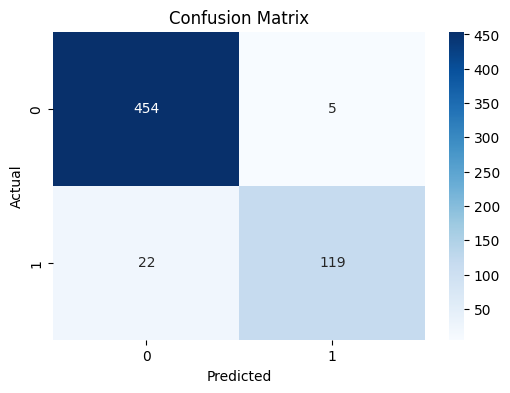

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

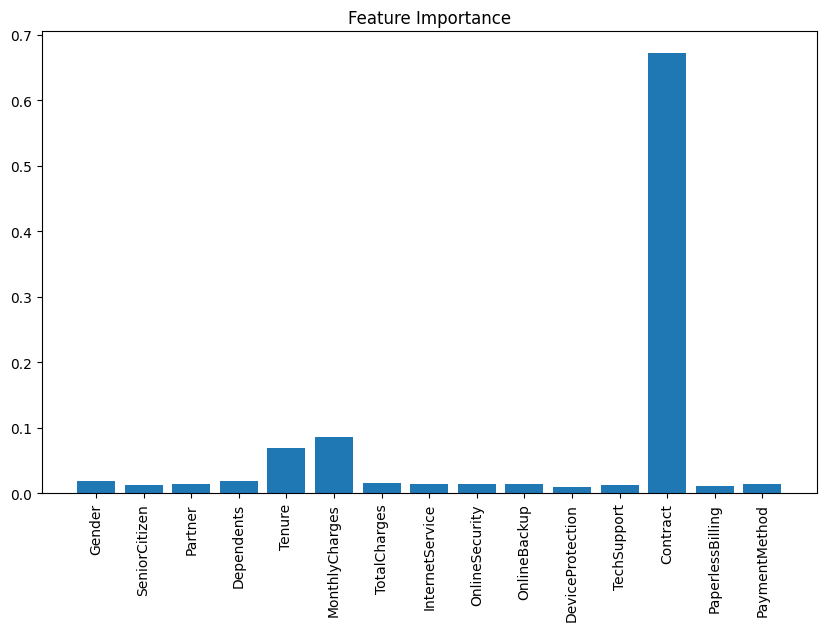

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(X.columns, model.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

In [19]:
import joblib
joblib.dump(model, "churn_xgb_model.pkl")
joblib.dump(encoders, "label_encoders.pkl")

['label_encoders.pkl']